In [1]:
import tensorflow as tf
from tensorflow.keras.regularizers import l1
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from sklearn.model_selection import train_test_split

data = scipy.io.loadmat('../ngml/ex4data1.mat')
X = np.array(data.get('X'))
y = np.ravel(np.array(data.get('y'))-1)

# randomly split the data into training, cross validation and test sets
random_state = 42

X_train, X_blind, y_train, y_blind = train_test_split(
    X, y, test_size=0.4, random_state=random_state)

X_test, X_cv, y_test, y_cv = train_test_split(
    X_blind, y_blind, test_size=0.5, random_state=random_state)

print(f'tf.__version__={tf.__version__}')
print(f'X.shape={X.shape}')
print(f'y.shape={y.shape}')
print(f'y max={np.max(y)} y min={np.min(y)}')

tf.__version__=2.16.1
X.shape=(5000, 400)
y.shape=(5000,)
y max=9 y min=0


In [2]:
# setup the layers
regfac = 0.0025
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(800, activation='relu', kernel_regularizer=l1(regfac)),
    tf.keras.layers.Dense(800, activation='relu', kernel_regularizer=l1(regfac)),
    # tf.keras.layers.Dense(200, activation='relu', kernel_regularizer=l1(regfac)),
    tf.keras.layers.Dense(10, activation='sigmoid', kernel_regularizer=l1(regfac))
])

epochs = 100
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=epochs, verbose=2, validation_data=(X_cv, y_cv))
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

Epoch 1/100


d:\Projects\Python\ml\house-prices-advanced-regression-techniques\.venv\Lib\site-packages\keras\src\backend\tensorflow\nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


94/94 - 1s - 14ms/step - accuracy: 0.6680 - loss: 23.6042 - val_accuracy: 0.7350 - val_loss: 3.2613
Epoch 2/100
94/94 - 0s - 5ms/step - accuracy: 0.7513 - loss: 2.6141 - val_accuracy: 0.7680 - val_loss: 2.2965
Epoch 3/100
94/94 - 0s - 5ms/step - accuracy: 0.8047 - loss: 2.1158 - val_accuracy: 0.8070 - val_loss: 1.9990
Epoch 4/100
94/94 - 0s - 5ms/step - accuracy: 0.8197 - loss: 1.9055 - val_accuracy: 0.8280 - val_loss: 1.8405
Epoch 5/100
94/94 - 0s - 5ms/step - accuracy: 0.8403 - loss: 1.7597 - val_accuracy: 0.8440 - val_loss: 1.7248
Epoch 6/100
94/94 - 0s - 5ms/step - accuracy: 0.8513 - loss: 1.6689 - val_accuracy: 0.8520 - val_loss: 1.6582
Epoch 7/100
94/94 - 0s - 5ms/step - accuracy: 0.8553 - loss: 1.6042 - val_accuracy: 0.8560 - val_loss: 1.5984
Epoch 8/100
94/94 - 0s - 5ms/step - accuracy: 0.8630 - loss: 1.5466 - val_accuracy: 0.8630 - val_loss: 1.5485
Epoch 9/100
94/94 - 0s - 5ms/step - accuracy: 0.8720 - loss: 1.5022 - val_accuracy: 0.8630 - val_loss: 1.5117
Epoch 10/100
94/94 -

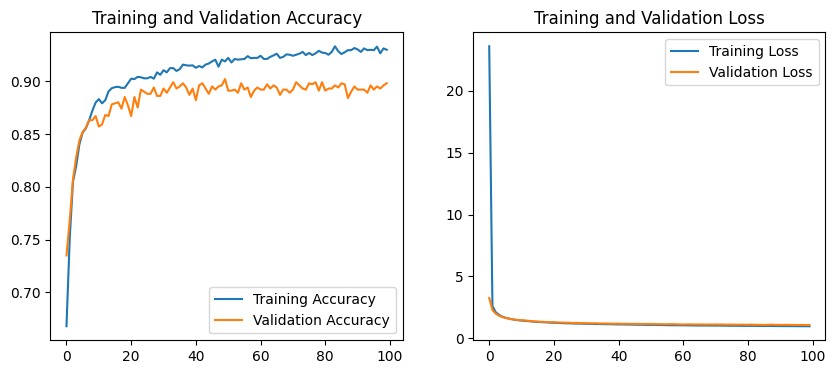

test acc: 87.70% test loss: 1.129


In [3]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

print(f'test acc: {test_acc*100:0.2f}% test loss: {test_loss:0.3f}')

In [4]:
tf.test.is_built_with_gpu_support()

False